In [1]:
'''
### Import Relevant Libraries
'''
import numpy as np # Version 1.16.0

import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import pandas as pd
import keras # Version 2.2.4
from sklearn.metrics import r2_score
import innvestigate as inn # Version 1.0.8
print("tensorflow version:", tf.__version__)
print("keras version:", keras.__version__)

tensorflow version: 2.13.0
keras version: 2.13.1


In [ ]:
'''
### Read and Process Data
'''
# Load in raw count data for neural network
X = pd.read_csv("Data/X.csv", index_col=0)
# Load in ground truth methane production rate data
y = pd.read_csv("Data/Y.csv", index_col=0)
# Set parameters
num_samples = X.shape[0]
num_folds = 149 # Leave-one-out = 149
num_features = 50 # All features = 489
# Create linearly spaced chunks for cross validation
chunks = np.ceil(np.linspace(0,num_samples, num=num_folds+1)).astype(int)

In [5]:
import pandas as pd

df = pd.read_excel('Data/Data.xlsx', sheet_name=1, header=None, skiprows=1)

df_transposed = df.T

df_transposed.columns = df_transposed.iloc[1]
df_final = df_transposed.drop([0, 1]).reset_index(drop=True)

# df_use = pd.get_dummies(df_final, columns=['Digester', 'Source', 'Type', 'Waste', 'Biomass'])

df_final.to_csv('df_1.csv', index=False)



In [ ]:
def load_cleaned_data(filepath):
    # Load the preprocessed data
    df = pd.read_csv(filepath)
    print(f"Loaded data from {filepath} with shape {df.shape}")
   
    # Remove rows with 'x' values
    df = df[~df.isin(['x']).any(axis=1)]
    return df

# Assuming your DataFrame is named df
# Specify the target columns
# target_columns = ['ACE-km', 'H2-km']
target_columns = ["Digester",
    "Source",
    "Type",
    "Waste",
    "Biomass",
    "Average-Total-ISD-Cells",
    "ACE-Xi",
    "ACE-km",
    "ACE-Ks",
    "H2-Xi",
    "H2-km",
    "H2-Ks"]

df = load_cleaned_data('Data/df_1.csv')

# Split the DataFrame into features (X) and targets (y)
X = df.drop(columns=target_columns)  # All columns except the targets
y = df[target_columns]  # Only the target columns
y = y.apply(pd.to_numeric, errors='coerce')

# Display the shapes of the resulting datasets
print(f"Features (X): {X.shape}")
print(f"Targets (y): {y.shape}")

num_samples = X.shape[0]
num_folds = 5
num_features = 500
chunks = np.ceil(np.linspace(0,num_samples, num=num_folds+1)).astype(int)

Loaded data from Data/df_1.csv with shape (60, 1099)
Features (X): (54, 1087)
Targets (y): (54, 12)


In [11]:
'''
### Define and Compile Model
'''
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, GlobalAveragePooling1D, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2


def build_model(input_shape):
    # Define model
    model = keras.models.Sequential([
            # keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape),
            # keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
            # keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
            # keras.layers.Dropout(0.3),
            # keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
            # keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
            # keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
            # keras.layers.Dropout(0.3),
            # keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
            # keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
            # keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
            # keras.layers.Dropout(0.3),
            # keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
            # keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
            # keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
            # keras.layers.Dropout(0.3),
            # keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
            # keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
            # keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
            # keras.layers.Dropout(0.3),
            # keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
            # keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
            # keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
            # keras.layers.Flatten(),
            # keras.layers.Dense(64, activation='relu'),
            # keras.layers.Dense(1)
            
            keras.layers.Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=input_shape),
            keras.layers.Conv1D(filters=128, kernel_size=1, activation='relu'),
            keras.layers.Conv1D(filters=128, kernel_size=1, activation='relu'),
            keras.layers.Dropout(0.1),
            keras.layers.Conv1D(filters=128, kernel_size=1, activation='relu'),
            keras.layers.Conv1D(filters=128, kernel_size=1, activation='relu'),
            keras.layers.Conv1D(filters=128, kernel_size=1, activation='relu'),
            keras.layers.Dropout(0.1),
            keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu'),
            keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu'),
            keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu'),
            keras.layers.Dropout(0.1),
            keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu'),
            keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu'),
            keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu'),
            keras.layers.Dropout(0.1),
            keras.layers.Conv1D(filters=32, kernel_size=1, activation='relu'),
            keras.layers.Conv1D(filters=32, kernel_size=1, activation='relu'),
            keras.layers.Conv1D(filters=32, kernel_size=1, activation='relu'),
            keras.layers.Dropout(0.1),
            keras.layers.Conv1D(filters=32, kernel_size=1, activation='relu'),
            keras.layers.Conv1D(filters=32, kernel_size=1, activation='relu'),
            keras.layers.Conv1D(filters=32, kernel_size=1, activation='relu'),
            keras.layers.Flatten(),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dense(1)
    ])

    # Compile Model
#     model.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.001))
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    
    return model

# def build_model(input_shape):
#     model = Sequential([
#         Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape),
#         Conv1D(filters=128, kernel_size=3, activation='relu'),
#         Conv1D(filters=128, kernel_size=3, activation='relu'),
#         Dropout(0.3),
#         Conv1D(filters=64, kernel_size=3, activation='relu'),
#         Conv1D(filters=64, kernel_size=3, activation='relu'),
#         Conv1D(filters=64, kernel_size=3, activation='relu'),
#         Dropout(0.3),
#         # Conv1D(filters=64, kernel_size=3, activation='relu'),
#         # Conv1D(filters=64, kernel_size=3, activation='relu'),
#         # Conv1D(filters=64, kernel_size=3, activation='relu'),
#         # Dropout(0.3),
#         Conv1D(filters=32, kernel_size=3, activation='relu'),
#         Conv1D(filters=32, kernel_size=3, activation='relu'),
#         Conv1D(filters=32, kernel_size=3, activation='relu'),
#         Dropout(0.3),
#         Conv1D(filters=32, kernel_size=3, activation='relu'),
#         Conv1D(filters=32, kernel_size=3, activation='relu'),
#         Conv1D(filters=32, kernel_size=3, activation='relu'),
#         Flatten(),
#         Dense(64, activation='relu'),
#         Dense(1)
#     ])
    
#     model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
#     return model


In [ ]:
'''
### Run Neural Network Cross Validation
'''
lrp_cache = pd.DataFrame()
ann_predictions = np.array([])
history_cache = []
for fold in range(num_folds):

    # Reset keras session to reduce model clutter
    tf.keras.backend.clear_session()

    # Select validation samples
    X_val = X[chunks[fold]:chunks[fold+1]]
    y_val = y[chunks[fold]:chunks[fold+1]]
    # Select training samples 
    X_train = X.drop(X_val.index)
    y_train = y.drop(X_val.index).values.flatten()
    
    # Feature selection using Layerwise Relevance Propegation (LRP)
    # Build and train model for LRP
    model = build_model((X_train.shape[1],1))
    model.fit(np.expand_dims(X_train.values, axis=2), y_train, batch_size=32, epochs=150, verbose=0)
    # Sort features by LRP Relevance Score
    analyzer = inn.create_analyzer("lrp.z_plus_fast", model)
    # Perform backwards pass through trained neural network to generate relevance scores
    scores = analyzer.analyze(np.expand_dims(X_train.values, axis=2))[...,0]
    # Store data in Dataframe
    lrp = pd.DataFrame(scores.mean(axis=0), index=X_train.columns, columns=["Score"])
    # Sort scores by absolute value
    lrp["Abs Score"] = np.abs(lrp["Score"])
    lrp_cache[fold] = lrp["Abs Score"]
    lrp.sort_values(by="Abs Score", ascending=False, inplace=True)

    # Select most important features
    X_train = X_train[lrp.index[:num_features]]
    X_val = X_val[lrp.index[:num_features]]

    # Reshape data for nerual network
    X_train = np.asarray(X_train).reshape((X_train.shape[0],X_train.shape[1],1))
    X_val = np.asarray(X_val).reshape((X_val.shape[0],X_val.shape[1],1))

    # Run neural network model
    model = build_model((X_train.shape[1],1))
    history = model.fit(X_train, y_train, batch_size=32, epochs=150, verbose=0, validation_data=(X_val, y_val))

    # Cache prediction values to array
    predictions = model.predict(X_val).flatten()
    ann_predictions = np.concatenate([ann_predictions, predictions])
    history_cache.append(history)

    # Print status update
    print("--------[{}/{}]--------".format(fold+1, num_folds))
    for i in range(chunks[fold+1] - chunks[fold]):
        print("Validation Sample:", y.index.values[chunks[fold]+i])
        print("ANN Prediction: {:.5f}".format(ann_predictions[chunks[fold]+i]))
        print("Ground Truth: {:.5f}\n".format(y.values.flatten()[chunks[fold]+i]))

# Print results    
print("\nCross Validation Results:\n")
ann_r2 = r2_score(y, ann_predictions)
print("Neural Network R2 Score: {:.5f}".format(ann_r2))

In [ ]:
## No Scaling

import tensorflow as tf
tf.compat.v1.disable_eager_execution()

import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

### Run Neural Network Cross Validation
lrp_cache = pd.DataFrame()
ann_predictions = np.array([])
history_cache = []

# Convert boolean columns to integers (if not already done)
X = X.astype({col: 'int32' for col in X.select_dtypes('bool').columns})

# Specify the target column for single-output regression
target_column = 'ACE-km'  # Replace with your target column name

for fold in range(num_folds):

    # Reset keras session to reduce model clutter
    tf.keras.backend.clear_session()

    # Select validation samples
    X_val = X[chunks[fold]:chunks[fold+1]]
    y_val = y[chunks[fold]:chunks[fold+1]][target_column]

    # Select training samples
    X_train = X.drop(X_val.index)
    y_train = y.drop(X_val.index)[target_column]

    # Ensure target values are numeric and have the correct shape
    y_train = y_train.astype(float).values
    y_val = y_val.astype(float).values

    # Convert data to numpy format and ensure all missing values are handled
    X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
    X_val = X_val.apply(pd.to_numeric, errors='coerce').fillna(0)

    # Reshape data for neural network input
    X_train = np.expand_dims(X_train.values, axis=2)  # Shape: (samples, features, 1)
    X_val = np.expand_dims(X_val.values, axis=2)  # Shape: (samples, features, 1)

    # Run Layerwise Relevance Propagation (LRP) for feature selection
    model = build_model((X_train.shape[1], 1))  # Ensure model output is 1 for regression
    model.fit(X_train, y_train, batch_size=32, epochs=150, verbose=0)

    # Generate relevance scores with LRP
    analyzer = inn.create_analyzer("lrp.z_plus_fast", model)
    scores = analyzer.analyze(X_train)[..., 0]
    lrp = pd.DataFrame(scores.mean(axis=0), index=X.columns, columns=["Score"])
    lrp["Abs Score"] = np.abs(lrp["Score"])
    lrp_cache[fold] = lrp["Abs Score"]
    lrp.sort_values(by="Abs Score", ascending=False, inplace=True)

    # Select the most important features
    selected_features = lrp.index[:num_features]
    selected_indices = [X.columns.get_loc(col) for col in selected_features]  # Get column indices
    X_train = X_train[:, selected_indices, :]  # Use numerical indices to slice
    X_val = X_val[:, selected_indices, :]

    # Build and train the neural network model
    model = build_model((X_train.shape[1], 1))  # Output size is 1
    history = model.fit(X_train, y_train, batch_size=32, epochs=150, verbose=0, validation_data=(X_val, y_val))

    # Make predictions
    predictions = model.predict(X_val).flatten()
    ann_predictions = np.concatenate([ann_predictions, predictions])
    history_cache.append(history)

    # Print status update
    print("--------[{}/{}]--------".format(fold + 1, num_folds))
    for i in range(chunks[fold + 1] - chunks[fold]):
        print("Validation Sample:", y.index.values[chunks[fold] + i])
        print("ANN Prediction: {:.5f}".format(ann_predictions[chunks[fold] + i]))
        print("Ground Truth: {:.5f}\n".format(y[target_column].values[chunks[fold] + i]))

# Print results    
print("\nCross Validation Results:\n")
ann_r2 = r2_score(y[target_column], ann_predictions)  # R² for single-output regression
print("Neural Network R2 Score: {:.5f}".format(ann_r2))


In [12]:
### Disable Eager Execution for TensorFlow (Required for `innvestigate`)
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

### Run Neural Network Cross Validation
lrp_cache = pd.DataFrame()
ann_predictions = np.array([])
history_cache = []

# Convert boolean columns to integers (if not already done)
X = X.astype({col: 'int32' for col in X.select_dtypes('bool').columns})

# Specify the target column for single-output regression
target_column = 'ACE-km'  # Replace with your target column name

scaler = MinMaxScaler()  # Initialize MinMaxScaler

for fold in range(num_folds):

    # Reset keras session to reduce model clutter
    tf.keras.backend.clear_session()

    # Select validation samples
    X_val = X[chunks[fold]:chunks[fold+1]]
    y_val = y[chunks[fold]:chunks[fold+1]][target_column]

    # Select training samples
    X_train = X.drop(X_val.index)
    y_train = y.drop(X_val.index)[target_column]

    # Ensure target values are numeric and have the correct shape
    y_train = y_train.astype(float).values
    y_val = y_val.astype(float).values

    # Scale features using MinMaxScaler (fit only on training data)
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    # Reshape data for neural network input
    X_train = np.expand_dims(X_train, axis=2)  # Shape: (samples, features, 1)
    X_val = np.expand_dims(X_val, axis=2)  # Shape: (samples, features, 1)

    # Run Layerwise Relevance Propagation (LRP) for feature selection
    model = build_model((X_train.shape[1], 1))  # Ensure model output is 1 for regression
    model.fit(X_train, y_train, batch_size=32, epochs=150, verbose=0)

    # Generate relevance scores with LRP
    analyzer = inn.create_analyzer("lrp.z_plus_fast", model)
    scores = analyzer.analyze(X_train)[..., 0]
    lrp = pd.DataFrame(scores.mean(axis=0), index=X.columns, columns=["Score"])
    lrp["Abs Score"] = np.abs(lrp["Score"])
    lrp_cache[fold] = lrp["Abs Score"]
    lrp.sort_values(by="Abs Score", ascending=False, inplace=True)

    # Select the most important features
    selected_features = lrp.index[:num_features]
    selected_indices = [X.columns.get_loc(col) for col in selected_features]  # Get column indices
    X_train = X_train[:, selected_indices, :]  # Use numerical indices to slice
    X_val = X_val[:, selected_indices, :]

    # Build and train the neural network model
    model = build_model((X_train.shape[1], 1))  # Output size is 1
    history = model.fit(X_train, y_train, batch_size=32, epochs=150, verbose=0, validation_data=(X_val, y_val))

    # Make predictions
    predictions = model.predict(X_val).flatten()
    ann_predictions = np.concatenate([ann_predictions, predictions])
    history_cache.append(history)

    # Print status update
    print("--------[{}/{}]--------".format(fold + 1, num_folds))
    for i in range(chunks[fold + 1] - chunks[fold]):
        print("Validation Sample:", y.index.values[chunks[fold] + i])
        print("ANN Prediction: {:.5f}".format(ann_predictions[chunks[fold] + i]))
        print("Ground Truth: {:.5f}\n".format(y[target_column].values[chunks[fold] + i]))

# Print results    
print("\nCross Validation Results:\n")
ann_r2 = r2_score(y[target_column], ann_predictions)  # R² for single-output regression
print("Neural Network R2 Score: {:.5f}".format(ann_r2))

/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
2024-12-16 14:23:23.992720: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-12-16 14:23:23.992772: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-16 14:23:23.992794: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-16 14:23:23.993281: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-16 14:23:23.993494: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc

--------[1/5]--------
Validation Sample: 0
ANN Prediction: 8.66131
Ground Truth: 2.90000

Validation Sample: 1
ANN Prediction: 9.72337
Ground Truth: 2.90000

Validation Sample: 2
ANN Prediction: 11.87648
Ground Truth: 3.20000

Validation Sample: 3
ANN Prediction: 52576360.00000
Ground Truth: 11.30000

Validation Sample: 4
ANN Prediction: 14605906.00000
Ground Truth: 8.50000

Validation Sample: 5
ANN Prediction: 13.33863
Ground Truth: 12.00000

Validation Sample: 6
ANN Prediction: 49.11263
Ground Truth: 25.90000

Validation Sample: 7
ANN Prediction: 14719909.00000
Ground Truth: 24.50000

Validation Sample: 8
ANN Prediction: 4577111.00000
Ground Truth: 29.10000

Validation Sample: 9
ANN Prediction: 15.95722
Ground Truth: 7.80000

Validation Sample: 10
ANN Prediction: 7.61204
Ground Truth: 8.00000



/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
2024-12-16 14:24:03.221850: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-16 14:24:03.221868: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-12-16 14:24:03.261674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for devi

--------[2/5]--------
Validation Sample: 11
ANN Prediction: 11726274.00000
Ground Truth: 6.50000

Validation Sample: 18
ANN Prediction: 165338688.00000
Ground Truth: 5.70000

Validation Sample: 19
ANN Prediction: 113399560.00000
Ground Truth: 3.30000

Validation Sample: 20
ANN Prediction: 191131056.00000
Ground Truth: 5.60000

Validation Sample: 21
ANN Prediction: 58896832.00000
Ground Truth: 4.90000

Validation Sample: 22
ANN Prediction: 49323688.00000
Ground Truth: 9.10000

Validation Sample: 23
ANN Prediction: 94782768.00000
Ground Truth: 7.90000

Validation Sample: 24
ANN Prediction: 310568512.00000
Ground Truth: 3.80000

Validation Sample: 25
ANN Prediction: 245959376.00000
Ground Truth: 3.60000

Validation Sample: 26
ANN Prediction: 6603400.00000
Ground Truth: 11.40000

Validation Sample: 27
ANN Prediction: 2530385.50000
Ground Truth: 11.50000



/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
2024-12-16 14:24:41.624545: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-16 14:24:41.624567: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-12-16 14:24:41.662055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for devi

--------[3/5]--------
Validation Sample: 28
ANN Prediction: 58973772.00000
Ground Truth: 48.70000

Validation Sample: 29
ANN Prediction: 64304904.00000
Ground Truth: 37.60000

Validation Sample: 30
ANN Prediction: 46920892.00000
Ground Truth: 33.60000

Validation Sample: 31
ANN Prediction: 9820339.00000
Ground Truth: 16.70000

Validation Sample: 32
ANN Prediction: 12939341.00000
Ground Truth: 15.20000

Validation Sample: 33
ANN Prediction: 13961692.00000
Ground Truth: 15.20000

Validation Sample: 34
ANN Prediction: 19649110.00000
Ground Truth: 5.60000

Validation Sample: 35
ANN Prediction: 5202690.00000
Ground Truth: 5.30000

Validation Sample: 36
ANN Prediction: 2430401.00000
Ground Truth: 28.60000

Validation Sample: 37
ANN Prediction: 3543962.50000
Ground Truth: 28.40000

Validation Sample: 38
ANN Prediction: 4965196.50000
Ground Truth: 27.20000



/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
2024-12-16 14:25:19.691138: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-16 14:25:19.691156: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-12-16 14:25:19.732278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for devi

--------[4/5]--------
Validation Sample: 39
ANN Prediction: 2853183.50000
Ground Truth: 9.80000

Validation Sample: 40
ANN Prediction: 1608955.00000
Ground Truth: 7.10000

Validation Sample: 41
ANN Prediction: 2192370.00000
Ground Truth: 7.40000

Validation Sample: 42
ANN Prediction: 92355664.00000
Ground Truth: 7.70000

Validation Sample: 43
ANN Prediction: 44538272.00000
Ground Truth: 7.00000

Validation Sample: 44
ANN Prediction: 31136820.00000
Ground Truth: 9.30000

Validation Sample: 45
ANN Prediction: -40.22897
Ground Truth: 20.00000

Validation Sample: 46
ANN Prediction: -126.31535
Ground Truth: 19.20000

Validation Sample: 47
ANN Prediction: -26.53266
Ground Truth: 18.20000

Validation Sample: 48
ANN Prediction: 6.54980
Ground Truth: 9.80000

Validation Sample: 49
ANN Prediction: 40630820.00000
Ground Truth: 7.10000



/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
2024-12-16 14:25:59.718942: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-16 14:25:59.718964: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-12-16 14:25:59.761403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for devi

--------[5/5]--------
Validation Sample: 50
ANN Prediction: 1521761.37500
Ground Truth: 7.40000

Validation Sample: 51
ANN Prediction: 152294384.00000
Ground Truth: 27.20000

Validation Sample: 52
ANN Prediction: 170221664.00000
Ground Truth: 23.40000

Validation Sample: 53
ANN Prediction: 213468480.00000
Ground Truth: 29.70000

Validation Sample: 54
ANN Prediction: 34504256.00000
Ground Truth: 7.90000

Validation Sample: 55
ANN Prediction: 61408228.00000
Ground Truth: 7.60000

Validation Sample: 56
ANN Prediction: 39163176.00000
Ground Truth: 7.90000

Validation Sample: 57
ANN Prediction: 88783360.00000
Ground Truth: 15.90000

Validation Sample: 58
ANN Prediction: 93252064.00000
Ground Truth: 16.00000

Validation Sample: 59
ANN Prediction: 91724496.00000
Ground Truth: 13.10000


Cross Validation Results:

Neural Network R2 Score: -72644320180954.40625


/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
2024-12-13 17:02:28.616497: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-13 17:02:28.616515: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-12-13 17:02:28.650042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for devi

--------[1/5]--------
Validation Sample: 0
ANN Prediction: 39.20304
Ground Truth: 7.30000

Validation Sample: 1
ANN Prediction: 37.35355
Ground Truth: 5.10000

Validation Sample: 2
ANN Prediction: 37.73251
Ground Truth: 5.80000

Validation Sample: 3
ANN Prediction: 66943496.00000
Ground Truth: 25.40000

Validation Sample: 4
ANN Prediction: 11483377.00000
Ground Truth: 34.40000

Validation Sample: 5
ANN Prediction: 63.84386
Ground Truth: 31.30000

Validation Sample: 6
ANN Prediction: 76.29812
Ground Truth: 99.80000

Validation Sample: 7
ANN Prediction: 59929740.00000
Ground Truth: 134.90000

Validation Sample: 8
ANN Prediction: 7057656.00000
Ground Truth: 104.80000

Validation Sample: 9
ANN Prediction: 32.74344
Ground Truth: 7.50000

Validation Sample: 10
ANN Prediction: 27.78326
Ground Truth: 7.00000



/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
2024-12-13 17:02:50.549201: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-13 17:02:50.549218: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-12-13 17:02:50.581385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for devi

--------[2/5]--------
Validation Sample: 11
ANN Prediction: 47718080.00000
Ground Truth: 8.80000

Validation Sample: 18
ANN Prediction: 589031808.00000
Ground Truth: 37.40000

Validation Sample: 19
ANN Prediction: 409979520.00000
Ground Truth: 37.60000

Validation Sample: 20
ANN Prediction: 612891264.00000
Ground Truth: 37.70000

Validation Sample: 21
ANN Prediction: 68461816.00000
Ground Truth: 30.70000

Validation Sample: 22
ANN Prediction: 54628428.00000
Ground Truth: 33.90000

Validation Sample: 23
ANN Prediction: 174032384.00000
Ground Truth: 32.50000

Validation Sample: 24
ANN Prediction: 102479560.00000
Ground Truth: 5.50000

Validation Sample: 25
ANN Prediction: 108325952.00000
Ground Truth: 4.80000

Validation Sample: 26
ANN Prediction: 30665310.00000
Ground Truth: 62.10000

Validation Sample: 27
ANN Prediction: 17651630.00000
Ground Truth: 65.50000



/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
2024-12-13 17:03:11.876932: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-13 17:03:11.876954: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-12-13 17:03:11.907608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for devi

--------[3/5]--------
Validation Sample: 28
ANN Prediction: 561052864.00000
Ground Truth: 86.70000

Validation Sample: 29
ANN Prediction: 584883776.00000
Ground Truth: 78.90000

Validation Sample: 30
ANN Prediction: 423780448.00000
Ground Truth: 78.20000

Validation Sample: 31
ANN Prediction: 94284400.00000
Ground Truth: 47.80000

Validation Sample: 32
ANN Prediction: 126623920.00000
Ground Truth: 37.30000

Validation Sample: 33
ANN Prediction: 126884024.00000
Ground Truth: 49.60000

Validation Sample: 34
ANN Prediction: 77359936.00000
Ground Truth: 39.50000

Validation Sample: 35
ANN Prediction: 57448336.00000
Ground Truth: 42.50000

Validation Sample: 36
ANN Prediction: 23803800.00000
Ground Truth: 66.10000

Validation Sample: 37
ANN Prediction: 33069694.00000
Ground Truth: 54.40000

Validation Sample: 38
ANN Prediction: 52805808.00000
Ground Truth: 56.80000



/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
2024-12-13 17:03:33.116275: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-13 17:03:33.116298: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-12-13 17:03:33.149236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for devi

--------[4/5]--------
Validation Sample: 39
ANN Prediction: 15489510.00000
Ground Truth: 19.90000

Validation Sample: 40
ANN Prediction: 10369381.00000
Ground Truth: 14.70000

Validation Sample: 41
ANN Prediction: 13701174.00000
Ground Truth: 15.20000

Validation Sample: 42
ANN Prediction: 545355136.00000
Ground Truth: 13.50000

Validation Sample: 43
ANN Prediction: 234693552.00000
Ground Truth: 12.30000

Validation Sample: 44
ANN Prediction: 185232064.00000
Ground Truth: 13.40000

Validation Sample: 45
ANN Prediction: 600.93884
Ground Truth: 14.10000

Validation Sample: 46
ANN Prediction: 1365.51892
Ground Truth: 16.30000

Validation Sample: 47
ANN Prediction: 429.90018
Ground Truth: 15.50000

Validation Sample: 48
ANN Prediction: 37.84278
Ground Truth: 19.90000

Validation Sample: 49
ANN Prediction: 220578688.00000
Ground Truth: 14.70000



/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
2024-12-13 17:03:54.353585: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-13 17:03:54.353605: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-12-13 17:03:54.385838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for devi

--------[5/5]--------
Validation Sample: 50
ANN Prediction: 11421986.00000
Ground Truth: 15.20000

Validation Sample: 51
ANN Prediction: 352656224.00000
Ground Truth: 96.10000

Validation Sample: 52
ANN Prediction: 441635392.00000
Ground Truth: 89.80000

Validation Sample: 53
ANN Prediction: 577163776.00000
Ground Truth: 89.80000

Validation Sample: 54
ANN Prediction: 152509312.00000
Ground Truth: 76.00000

Validation Sample: 55
ANN Prediction: 258159072.00000
Ground Truth: 65.50000

Validation Sample: 56
ANN Prediction: 155313712.00000
Ground Truth: 43.40000

Validation Sample: 57
ANN Prediction: 79606072.00000
Ground Truth: 25.20000

Validation Sample: 58
ANN Prediction: 93076672.00000
Ground Truth: 28.00000

Validation Sample: 59
ANN Prediction: 53518120.00000
Ground Truth: 25.20000


Cross Validation Results:

Neural Network R2 Score: -59236705943734.54688
Mean Squared Error: 56933591958110072.00000


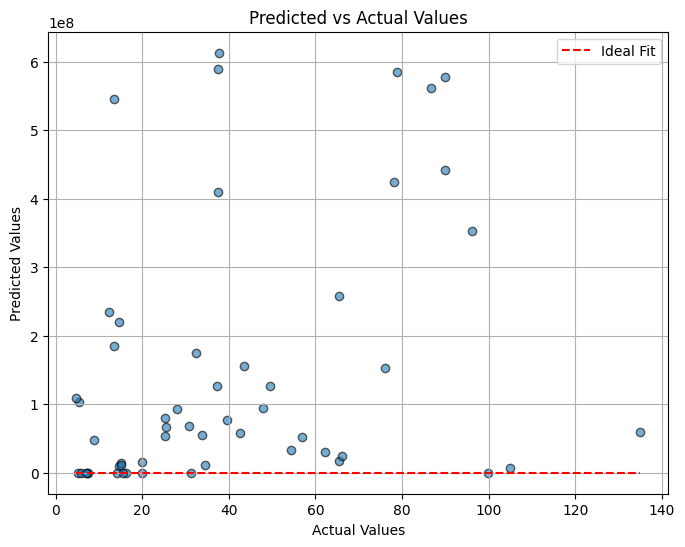

In [12]:
### Disable Eager Execution for TensorFlow (Required for `innvestigate`)
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

### Run Neural Network Cross Validation
lrp_cache = pd.DataFrame()
ann_predictions = np.array([])
history_cache = []

# Convert boolean columns to integers (if not already done)
X = X.astype({col: 'int32' for col in X.select_dtypes('bool').columns})

# Specify the target column for single-output regression
target_column = 'H2-km'  # Replace with your target column name

scaler = MinMaxScaler()  # Initialize MinMaxScale

for fold in range(num_folds):

    # Reset keras session to reduce model clutter
    tf.keras.backend.clear_session()

    # Select validation samples
    X_val = X[chunks[fold]:chunks[fold+1]]
    y_val = y[chunks[fold]:chunks[fold+1]][target_column]

    # Select training samples
    X_train = X.drop(X_val.index)
    y_train = y.drop(X_val.index)[target_column]

    # Ensure target values are numeric and have the correct shape
    y_train = y_train.astype(float).values
    y_val = y_val.astype(float).values

    # Scale features using MinMaxScaler (fit only on training data)
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    # Reshape data for neural network input
    X_train = np.expand_dims(X_train, axis=2)  # Shape: (samples, features, 1)
    X_val = np.expand_dims(X_val, axis=2)  # Shape: (samples, features, 1)

    # Run Layerwise Relevance Propagation (LRP) for feature selection
    model = build_model((X_train.shape[1], 1))  # Ensure model output is 1 for regression
    model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=0)

    # Generate relevance scores with LRP
    analyzer = inn.create_analyzer("lrp.z_plus_fast", model)
    scores = analyzer.analyze(X_train)[..., 0]
    lrp = pd.DataFrame(scores.mean(axis=0), index=X.columns, columns=["Score"])
    lrp["Abs Score"] = np.abs(lrp["Score"])
    lrp_cache[fold] = lrp["Abs Score"]
    lrp.sort_values(by="Abs Score", ascending=False, inplace=True)

    # Select the most important features
    selected_features = lrp.index[:num_features]
    selected_indices = [X.columns.get_loc(col) for col in selected_features]  # Get column indices
    X_train = X_train[:, selected_indices, :]  # Use numerical indices to slice
    X_val = X_val[:, selected_indices, :]

    # Build and train the neural network model
    model = build_model((X_train.shape[1], 1))  # Output size is 1
    history = model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=0, validation_data=(X_val, y_val))

    # Make predictions
    predictions = model.predict(X_val).flatten()
    ann_predictions = np.concatenate([ann_predictions, predictions])
    history_cache.append(history)

    # Print status update
    print("--------[{}/{}]--------".format(fold + 1, num_folds))
    for i in range(chunks[fold + 1] - chunks[fold]):
        print("Validation Sample:", y.index.values[chunks[fold] + i])
        print("ANN Prediction: {:.5f}".format(ann_predictions[chunks[fold] + i]))
        print("Ground Truth: {:.5f}\n".format(y[target_column].values[chunks[fold] + i]))

# Calculate R² and MSE
print("\nCross Validation Results:\n")
ann_r2 = r2_score(y[target_column], ann_predictions)  # R² for single-output regression
mse = mean_squared_error(y[target_column], ann_predictions)  # Mean Squared Error
print("Neural Network R2 Score: {:.5f}".format(ann_r2))
print("Mean Squared Error: {:.5f}".format(mse))

# Plot Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y[target_column], ann_predictions, alpha=0.6, edgecolor="k")
plt.plot([y[target_column].min(), y[target_column].max()],
         [y[target_column].min(), y[target_column].max()],
         color='red', linestyle='--', label='Ideal Fit')
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
### Disable Eager Execution for TensorFlow (Required for `innvestigate`)
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

### Run Neural Network Cross Validation
lrp_cache = pd.DataFrame()
ann_predictions = np.array([])
history_cache = []

# Convert boolean columns to integers (if not already done)
X = X.astype({col: 'int32' for col in X.select_dtypes('bool').columns})

# Specify the target column for single-output regression
target_column = 'ACE-km'  # Replace with your target column name

scaler = MinMaxScaler()  # Initialize MinMaxScaler

for fold in range(num_folds):

    # Reset keras session to reduce model clutter
    tf.keras.backend.clear_session()

    # Select validation samples
    X_val = X[chunks[fold]:chunks[fold+1]]
    y_val = y[chunks[fold]:chunks[fold+1]][target_column]

    # Select training samples
    X_train = X.drop(X_val.index)
    y_train = y.drop(X_val.index)[target_column]

    # Ensure target values are numeric and have the correct shape
    y_train = y_train.astype(float).values
    y_val = y_val.astype(float).values

    # Scale features using MinMaxScaler (fit only on training data)
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    # Reshape data for neural network input
    X_train = np.expand_dims(X_train, axis=2)  # Shape: (samples, features, 1)
    X_val = np.expand_dims(X_val, axis=2)  # Shape: (samples, features, 1)

    # Run Layerwise Relevance Propagation (LRP) for feature selection
    model = build_model((X_train.shape[1], 1))  # Ensure model output is 1 for regression
    model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)

    # Generate relevance scores with LRP
    analyzer = inn.create_analyzer("lrp.z_plus_fast", model)
    scores = analyzer.analyze(X_train)[..., 0]
    lrp = pd.DataFrame(scores.mean(axis=0), index=X.columns, columns=["Score"])
    lrp["Abs Score"] = np.abs(lrp["Score"])
    lrp_cache[fold] = lrp["Abs Score"]  # Cache the absolute scores for all folds
    lrp.sort_values(by="Abs Score", ascending=False, inplace=True)

    # Select the most important features
    selected_features = lrp.index[:num_features]
    selected_indices = [X.columns.get_loc(col) for col in selected_features]  # Get column indices
    X_train = X_train[:, selected_indices, :]  # Use numerical indices to slice
    X_val = X_val[:, selected_indices, :]

    # Build and train the neural network model
    model = build_model((X_train.shape[1], 1))  # Output size is 1
    history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0, validation_data=(X_val, y_val))

    # Make predictions
    predictions = model.predict(X_val).flatten()
    ann_predictions = np.concatenate([ann_predictions, predictions])
    history_cache.append(history)

    # Print status update
    print("--------[{}/{}]--------".format(fold + 1, num_folds))

# Calculate R² and MSE
print("\nCross Validation Results:\n")
ann_r2 = r2_score(y[target_column], ann_predictions)  # R² for single-output regression
mse = mean_squared_error(y[target_column], ann_predictions)  # Mean Squared Error
print("Neural Network R2 Score: {:.5f}".format(ann_r2))
print("Mean Squared Error: {:.5f}".format(mse))

# After Cross Validation: Aggregate LRP Scores and Determine Top Features
final_lrp_scores = lrp_cache.mean(axis=1).sort_values(ascending=False)  # Average scores across folds
top_features = final_lrp_scores.head(10)  # Get the top 10 features

print("\nTop 10 Features Selected After LRP:")
print(top_features)

# Plot Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y[target_column], ann_predictions, alpha=0.6, edgecolor="k")
plt.plot([y[target_column].min(), y[target_column].max()],
         [y[target_column].min(), y[target_column].max()],
         color='red', linestyle='--', label='Ideal Fit')
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


2024-12-10 18:42:29.422687: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-10 18:42:29.422719: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-12-10 18:42:29.469147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-10 18:42:29.518778: W tensorflow/c/c_api.cc:304] Operation '{name:'training/Adam/conv1d_15/kernel/v/Assign' id:1404 op device:{requested: '', assigned: ''} def:{{{node training/Adam/conv1d_15/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/conv

--------[1/5]--------


2024-12-10 18:43:00.995447: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-10 18:43:00.995470: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-12-10 18:43:01.042166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-10 18:43:01.089588: W tensorflow/c/c_api.cc:304] Operation '{name:'training/Adam/conv1d_17/kernel/v/Assign' id:1428 op device:{requested: '', assigned: ''} def:{{{node training/Adam/conv1d_17/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/conv

--------[2/5]--------


2024-12-10 18:43:33.293112: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-10 18:43:33.293139: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-12-10 18:43:33.340760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-10 18:43:33.392690: W tensorflow/c/c_api.cc:304] Operation '{name:'training/Adam/conv1d_16/kernel/v/Assign' id:1416 op device:{requested: '', assigned: ''} def:{{{node training/Adam/conv1d_16/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/conv

--------[3/5]--------


2024-12-10 18:44:06.941652: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-10 18:44:06.941684: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-12-10 18:44:06.983306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-10 18:44:07.029176: W tensorflow/c/c_api.cc:304] Operation '{name:'training/Adam/conv1d_14/bias/v/Assign' id:1397 op device:{requested: '', assigned: ''} def:{{{node training/Adam/conv1d_14/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/conv1d_1

--------[4/5]--------


2024-12-10 18:44:39.418128: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-10 18:44:39.418151: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-12-10 18:44:39.467862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-10 18:44:39.519662: W tensorflow/c/c_api.cc:304] Operation '{name:'training/Adam/dense_1/bias/v/Assign' id:1455 op device:{requested: '', assigned: ''} def:{{{node training/Adam/dense_1/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/dense_1/bias

--------[5/5]--------

Cross Validation Results:



ValueError: Input contains NaN.